In [15]:
### start with skeleton of refined_misty_spectra.py
import trident
import numpy as np
import yt
import os

os.sys.path.insert(0, '/Users/molly/Dropbox/misty/MISTY-pipeline/MISTY')
import MISTY
import sys
import os
import argparse

from astropy.table import Table
from astropy.io import fits

from get_refine_box import get_refine_box
from get_proper_box_size import get_proper_box_size
from get_halo_center import get_halo_center
from plot_misty_spectra import plot_misty_spectra

from yt.units import km, s
c = 299792.458 * km/s

import show_velphase as sv

from math import pi

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## going to get the endpoints from an interesting spectrum
hdulist = fits.open('/Users/molly/Dropbox/foggie-collab/plots_halo_008508/nref11n/nref11n_nref10f_refine200kpc/spectra/hlsp_misty_foggie_halo008508_nref11n_nref10f_rd0020_axy_i019.4-a4.22_v4_lsf.fits.gz')
ray_start_str, ray_end_str = hdulist[0].header['RAYSTART'], hdulist[0].header['RAYEND']
ray_start = [float(ray_start_str.split(",")[0].strip('unitary ')), \
       float(ray_start_str.split(",")[1].strip('unitary ')), \
       float(ray_start_str.split(",")[2].strip('unitary '))]
ray_end = [float(ray_end_str.split(",")[0].strip('unitary ')), \
       float(ray_end_str.split(",")[1].strip('unitary ')), \
       float(ray_end_str.split(",")[2].strip('unitary '))]
rs, re = np.array(ray_start), np.array(ray_end)


In [3]:
ds = yt.load('/Users/molly/foggie/halo_008508/nref11n/nref11n_nref10f_refine200kpc/RD0020/RD0020')
rs = ds.arr(rs, "code_length")
re = ds.arr(re, "code_length")
ray = ds.ray(rs, re)

ray_sort = np.argsort(ray['t'])

### are probably going to want fixed-resolution rays at some point, but for now since it's uniform cell size.....

yt : [INFO     ] 2018-10-03 14:05:58,582 Parameters: current_time              = 154.80103271743
yt : [INFO     ] 2018-10-03 14:05:58,583 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-10-03 14:05:58,585 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-10-03 14:05:58,586 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-10-03 14:05:58,587 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-10-03 14:05:58,588 Parameters: current_redshift          = 1.9999996879495
yt : [INFO     ] 2018-10-03 14:05:58,590 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-10-03 14:05:58,591 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-10-03 14:05:58,592 Parameters: hubble_constant           = 0.695
Parsing Hierarchy : 100%|██████████| 4574/4574 [00:00<00:00, 15155.98it/s]
yt : [INFO     ] 2018-10-03 14:05:59,109 Gathering a field list (this may take a moment.)
/Users/molly/anaco

spectacle [INFO    ]: font.family must be one of (serif, sans-serif, cursive, monospace) when text.usetex is True. serif will be used by default.
spectacle [INFO    ]: font.family must be one of (serif, sans-serif, cursive, monospace) when text.usetex is True. serif will be used by default.
spectacle [INFO    ]: font.family must be one of (serif, sans-serif, cursive, monospace) when text.usetex is True. serif will be used by default.
spectacle [INFO    ]: font.family must be one of (serif, sans-serif, cursive, monospace) when text.usetex is True. serif will be used by default.


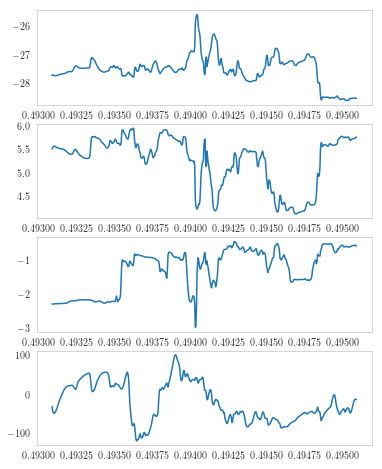

In [4]:
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(411)
ax1.plot(ray['x'][ray_sort], np.log10(ray['density'][ray_sort]))

ax2 = fig.add_subplot(412)
ax2.plot(ray['x'][ray_sort], np.log10(ray['temperature'][ray_sort]))

ax3 = fig.add_subplot(413)
ax3.plot(ray['x'][ray_sort], np.log10(ray['metallicity'][ray_sort]))

ax4 = fig.add_subplot(414)
ax4.plot(ray['x'][ray_sort], ray['x-velocity'][ray_sort].in_units('km/s'),)

In [45]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('al

In [5]:
trident.add_ion_fields(ds, ions=['H I', 'Si II', 'O VI'])
line_list = ['H I 1216','Si II 1260', 'O VI 1032']
triray = trident.make_simple_ray(ds, start_position=rs.copy(),
                  end_position=re.copy(),
                  data_filename="test.h5",
                  lines=line_list,
                  ftype='gas',
                  fields=['metallicity', 'H_p0_number_density','Si_p1_ion_fraction', 'O_p5_ion_fraction'])


yt : [WARNING  ] 2018-10-03 14:06:16,214 Field ('gas', 'H_number_density') already exists. To override use force_override=True.
yt : [WARNING  ] 2018-10-03 14:06:16,218 Field ('gas', 'H_density') already exists. To override use force_override=True.
yt : [WARNING  ] 2018-10-03 14:06:16,221 Field ('gas', 'H_mass') already exists. To override use force_override=True.
yt : [INFO     ] 2018-10-03 14:06:16,362 Getting segment at z = 1.9999996879495: [0.493091   0.48874779 0.50248411] unitary to [0.495091   0.48874779 0.50248411] unitary.
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/yt/units/yt_array.py:1314: RuntimeWarning: invalid value encountered in true_divide
  out=out, **kwargs)
yt : [INFO     ] 2018-10-03 14:06:16,364 Getting subsegment: [0.493091 unitary, 0.488747792625 unitary, 0.502484112692 unitary] to [0.495091 unitary, 0.488747792625 unitary, 0.502484112692 unitary].
yt : [INFO     ] 2018-10-03 14:06:17,360 Saving field data to yt dataset: test.h5.
yt : [IN

In [6]:
len(triray.r['dl']), len(ray['x'][ray_sort])

yt : [INFO     ] 2018-10-03 14:06:41,603 Allocating for 5.260e+02 particles (index particle type 'all')
yt : [INFO     ] 2018-10-03 14:06:41,614 Identified 3.610e+02 octs


(526, 526)

In [7]:
np.log10((triray.r['H_p0_number_density']*triray.r['dl']).sum().d)


16.92225278185975

Text(0,0.5,'los velocity')

spectacle [INFO    ]: font.family must be one of (serif, sans-serif, cursive, monospace) when text.usetex is True. serif will be used by default.
spectacle [INFO    ]: font.family must be one of (serif, sans-serif, cursive, monospace) when text.usetex is True. serif will be used by default.
spectacle [INFO    ]: font.family must be one of (serif, sans-serif, cursive, monospace) when text.usetex is True. serif will be used by default.
spectacle [INFO    ]: font.family must be one of (serif, sans-serif, cursive, monospace) when text.usetex is True. serif will be used by default.


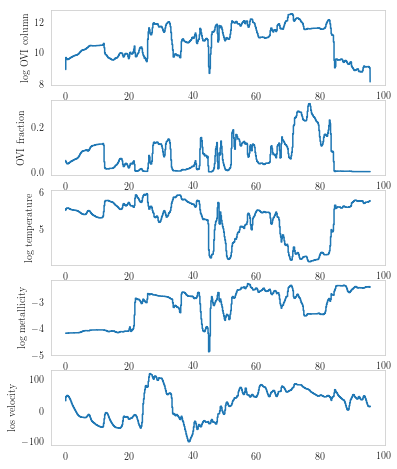

In [8]:
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(511)
ax1.step(triray.r['dl'].cumsum().in_units('kpc'), np.log10(triray.r['dl']*triray.r[('gas','O_p5_number_density')]))
ax1.set_xlim(0,100)
ax1.set_ylabel('log OVI column')

ax2 = fig.add_subplot(512, sharex=ax1)
ax2.step(triray.r['dl'].cumsum().in_units('kpc'), triray.r[('gas','O_p5_ion_fraction')])
ax2.set_ylabel('OVI fraction')

ax3 = fig.add_subplot(513, sharex=ax1)
ax3.step(triray.r['dl'].cumsum().in_units('kpc'), np.log10(triray.r[('gas','temperature')]))
ax3.set_ylabel('log temperature')

ax4 = fig.add_subplot(514, sharex=ax1)
ax4.step(triray.r['dl'].cumsum().in_units('kpc'), np.log10(triray.r[('gas','metallicity')]))
ax4.set_ylabel('log metallicity')

ax5 = fig.add_subplot(515, sharex=ax1)
ax5.step(triray.r['dl'].cumsum().in_units('kpc'), triray.r[('gas','velocity_los')].in_units('km/s'))
ax5.set_ylabel('los velocity')


In [9]:
triray.r[('gas','velocity_los')].in_units('km/s')

YTArray([  31.6770652 ,   44.64328367,   47.11805004,   49.00226076,
           48.59462091,   46.5371787 ,   44.76697094,   40.970461  ,
           37.55667473,   33.33322647,   28.35485643,   23.32916156,
           18.3228476 ,   15.18563921,   10.85763464,    7.90007597,
            3.59054108,    0.5827189 ,   -3.30956408,   -5.99299163,
          -10.00272255,  -12.52383178,  -15.19735379,  -16.88736157,
          -18.43276013,  -19.63271398,  -20.73381816,  -21.24783427,
          -21.67076941,  -21.9850337 ,  -22.09263482,  -22.34252001,
          -22.8201304 ,  -23.22964037,  -23.49455412,  -23.13379867,
          -21.59480375,  -19.50474291,  -17.67821207,  -15.06849115,
          -12.58271851,  -13.97035781,  -17.51096662,  -23.25784574,
          -28.19370293,  -32.54307127,  -35.2788528 ,  -36.80164588,
          -38.82707024,  -40.05913554,  -41.34057288,  -42.87958489,
          -44.89079128,  -46.36436766,  -47.22089955,  -48.1189436 ,
          -49.41174562,  -50.69620

In [10]:

ray['x-velocity'][ray_sort].in_units('km/s')

YTArray([ -31.6770652 ,  -44.64328367,  -47.11805004,  -49.00226076,
          -48.59462091,  -46.5371787 ,  -44.76697094,  -40.970461  ,
          -37.55667473,  -33.33322647,  -28.35485643,  -23.32916156,
          -18.3228476 ,  -15.18563921,  -10.85763464,   -7.90007597,
           -3.59054108,   -0.5827189 ,    3.30956408,    5.99299163,
           10.00272255,   12.52383178,   15.19735379,   16.88736157,
           18.43276013,   19.63271398,   20.73381816,   21.24783427,
           21.67076941,   21.9850337 ,   22.09263482,   22.34252001,
           22.8201304 ,   23.22964037,   23.49455412,   23.13379867,
           21.59480375,   19.50474291,   17.67821207,   15.06849115,
           12.58271851,   13.97035781,   17.51096662,   23.25784574,
           28.19370293,   32.54307127,   35.2788528 ,   36.80164588,
           38.82707024,   40.05913554,   41.34057288,   42.87958489,
           44.89079128,   46.36436766,   47.22089955,   48.1189436 ,
           49.41174562,   50.69620

spectacle [INFO    ]: font.family must be one of (serif, sans-serif, cursive, monospace) when text.usetex is True. serif will be used by default.
spectacle [INFO    ]: font.family must be one of (serif, sans-serif, cursive, monospace) when text.usetex is True. serif will be used by default.
spectacle [INFO    ]: font.family must be one of (serif, sans-serif, cursive, monospace) when text.usetex is True. serif will be used by default.
spectacle [INFO    ]: font.family must be one of (serif, sans-serif, cursive, monospace) when text.usetex is True. serif will be used by default.


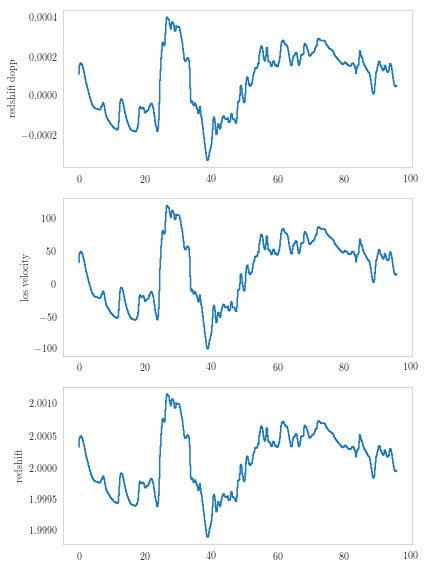

In [12]:
redshift_eff = ds.current_redshift + triray.r[('gas','velocity_los')].in_units('km/s') / c

fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(311)
ax1.step(triray.r['dl'].cumsum().in_units('kpc'), triray.r['redshift_dopp'])
ax1.set_xlim(0,100)
ax1.set_ylabel('redshift dopp')


ax3 = fig.add_subplot(312, sharex=ax1)
ax3.step(triray.r['dl'].cumsum().in_units('kpc'), triray.r[('gas','velocity_los')].in_units('km/s'))
ax3.set_ylabel('los velocity')


ax5 = fig.add_subplot(313, sharex=ax1)
ax5.step(triray.r['dl'].cumsum().in_units('kpc'), triray.r['redshift_eff'])
ax5.set_ylabel('redshift')


plt.tight_layout()

In [25]:
triray.field_list

[('all', 'H_number_density'),
 ('all', 'H_p0_number_density'),
 ('all', 'O_p5_ion_fraction'),
 ('all', 'O_p5_number_density'),
 ('all', 'Si_p1_ion_fraction'),
 ('all', 'Si_p1_number_density'),
 ('all', 'dl'),
 ('all', 'dredshift'),
 ('all', 'dx'),
 ('all', 'dy'),
 ('all', 'dz'),
 ('all', 'metallicity'),
 ('all', 'redshift'),
 ('all', 'redshift_dopp'),
 ('all', 'redshift_eff'),
 ('all', 'temperature'),
 ('all', 'velocity_los'),
 ('all', 'velocity_x'),
 ('all', 'velocity_y'),
 ('all', 'velocity_z'),
 ('all', 'x'),
 ('all', 'y'),
 ('all', 'z'),
 ('gas', 'H_number_density'),
 ('gas', 'H_p0_number_density'),
 ('gas', 'O_p5_ion_fraction'),
 ('gas', 'O_p5_number_density'),
 ('gas', 'Si_p1_ion_fraction'),
 ('gas', 'Si_p1_number_density'),
 ('gas', 'dl'),
 ('gas', 'dredshift'),
 ('gas', 'dx'),
 ('gas', 'dy'),
 ('gas', 'dz'),
 ('gas', 'metallicity'),
 ('gas', 'redshift'),
 ('gas', 'redshift_dopp'),
 ('gas', 'redshift_eff'),
 ('gas', 'temperature'),
 ('gas', 'velocity_los'),
 ('gas', 'velocity_x'

Text(0,0.5,'trident redshift eff')

spectacle [INFO    ]: font.family must be one of (serif, sans-serif, cursive, monospace) when text.usetex is True. serif will be used by default.
spectacle [INFO    ]: font.family must be one of (serif, sans-serif, cursive, monospace) when text.usetex is True. serif will be used by default.
spectacle [INFO    ]: font.family must be one of (serif, sans-serif, cursive, monospace) when text.usetex is True. serif will be used by default.
spectacle [INFO    ]: font.family must be one of (serif, sans-serif, cursive, monospace) when text.usetex is True. serif will be used by default.


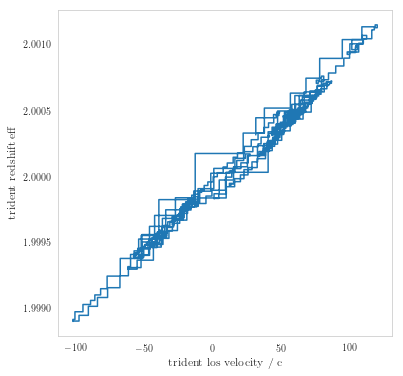

In [17]:
#redshift_eff = ds.current_redshift + triray.r[('gas','velocity_los')].in_units('km/s') / c
# print(triray.r['redshift_eff'])
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
ax1.step(triray.r[('gas','velocity_los')].in_units('km/s'), triray.r['redshift_eff'])
#ax1.set_xlim(-0.0004,0.0004)
#ax1.set_ylim(-0.0004,0.0004)
ax1.set_xlabel('trident los velocity / c',fontsize=12)
ax1.set_ylabel('trident redshift eff',fontsize=12)


In [47]:
ldb = trident.LineDatabase('lines.txt')
lambda_min = 1260. * (1 + min(triray.r['redshift_eff'])) - 5
lambda_max = 1260. * (1 + max(triray.r['redshift_eff'])) + 5

sg = trident.SpectrumGenerator(lambda_min=lambda_min.value,
                               lambda_max=lambda_max.value,
                               dlambda=0.01,
                               line_database='lines.txt'
                            #   line_database='atom_wave_gamma_f.dat'
                               )
sg.make_spectrum(triray, lines=['Si II 1260'], min_tau=1.e-5,
                 store_observables=True)


yt : [INFO     ] 2018-06-19 16:55:09,255 Setting instrument to Custom
yt : [INFO     ] 2018-06-19 16:55:09,266 Creating spectrum
Adding line - Si II 1260 [1260.422100 A]: : 100%|██████████| 526/526 [00:00<00:00, 5829.69it/s]


In [52]:
sg.line_observables_dict

{'Si II 1260': {'column_density': YTArray([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.0000000

<IPython.core.display.Javascript object>


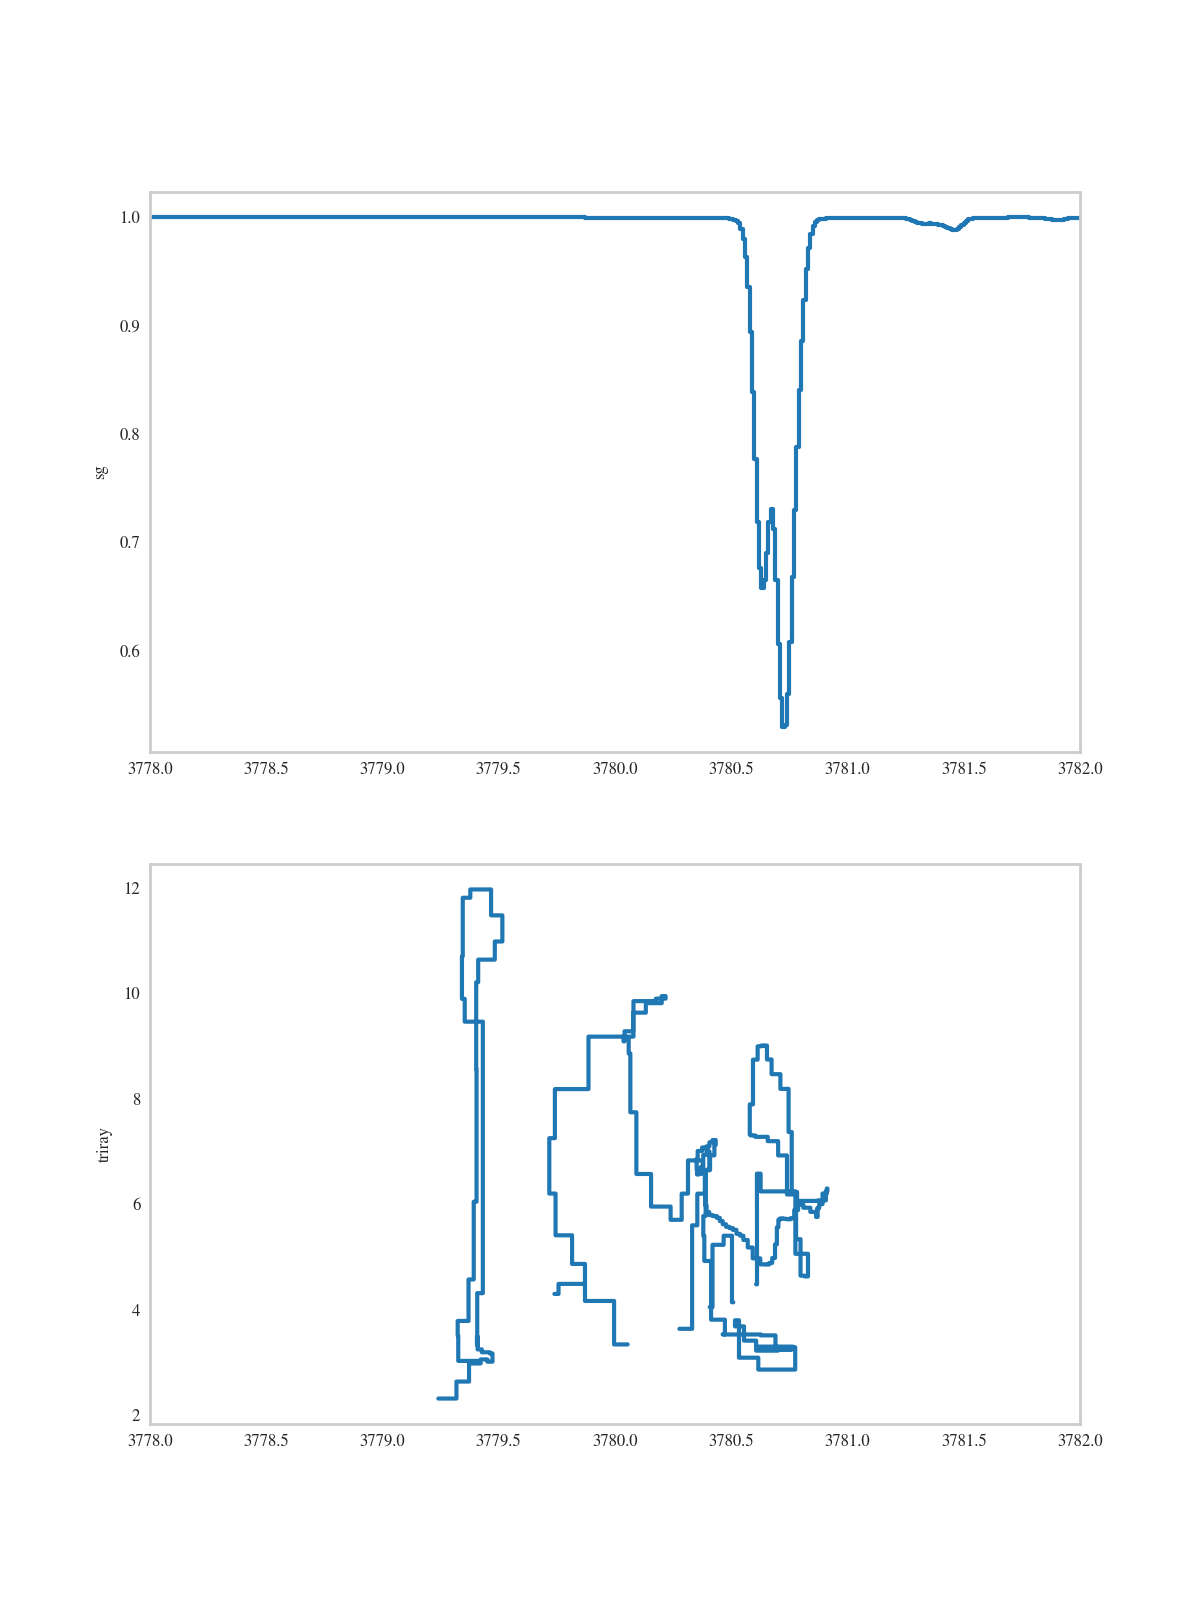

Text(0,0.5,u'triray')

In [61]:
wavelength = (1 + triray.r['redshift_eff']) * 1260.

# print(triray.r['redshift_eff'])
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax1.step(sg.lambda_field, sg.flux_field)
ax1.set_xlim(3778,3782)
#ax1.set_ylim(1.998, 2.0015)
ax1.set_ylabel('sg')

ax2 = fig.add_subplot(212, sharex=ax1)
ax2.step(wavelength, np.log10(triray.r['dl']*triray.r[('gas','Si_p1_number_density')]))
ax2.set_xlim(3778,3782)
ax2.set_ylabel('triray')
